# Grating color

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


In [3]:
download_chandra_obsid 1451 evt2
mv -fv 1451/primary/acisf01451N007_evt2.fits.gz .
gunzip -f acisf01451N007_evt2.fits.gz
rmdir -p 1451/primary


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt2     fits       23 Mb  ####################          < 1 s  38159.5 kb/s

'1451/primary/acisf01451N006_evt2.fits.gz' -> './acisf01451N006_evt2.fits.gz'


In [4]:
dmcopy "acisf01451N007_evt2.fits[tg_srcid=1,tg_part=0,1,2,tg_m=-3,-2,-1,0,1,2,3]" \
      1451_spec_evt2.fits opt=all clob+

## In sky coords

In [5]:
pset dmcopy infile="1451_spec_evt2.fits[energy=000:999][bin sky=2000:7000:8]"
pset dmcopy outfile=sky_red.fits
dmcopy mode=h clob+

In [6]:
dmcopy "1451_spec_evt2.fits[energy=800:2399][bin sky=2000:7000:8]" \
      sky_green.fits clob+

In [7]:
dmcopy "1451_spec_evt2.fits[energy=1700:9999][bin sky=2000:7000:8]" \
      sky_blue.fits clob+

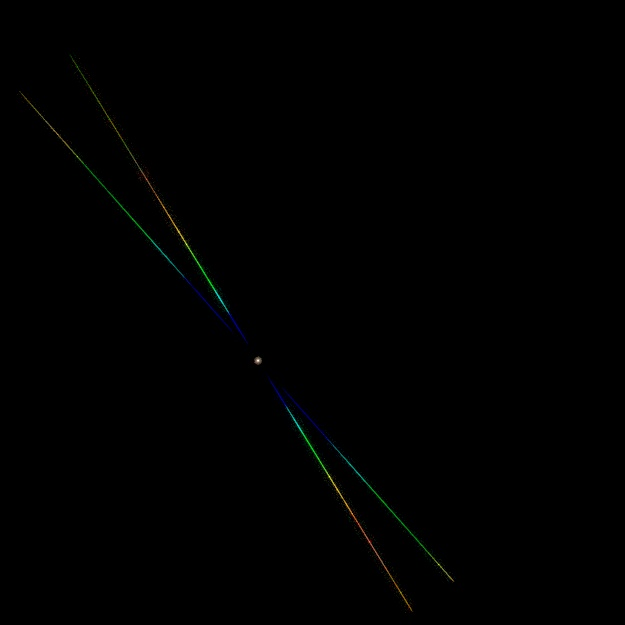

In [8]:
pset dmimg2jpg infile=sky_red.fits
pset dmimg2jpg greenfile=sky_green.fits
pset dmimg2jpg bluefile=sky_blue.fits
pset dmimg2jpg outfile=sky_1451.jpg
dmimg2jpg mode=h clob+

display < sky_1451.jpg

## In TG coords

In [9]:
dmcopy "1451_spec_evt2.fits[tg_d=-0.000663889:0.000663889,tg_lam=1:25.005,energy=000:999]" \
      red_filter.fits clob+

In [10]:
dmcopy "red_filter.fits[bin tg_lam=1:25.00:0.04,tg_d=-1.0e-3:1.0e-3:2.0e-5]" \
      ga_red.fits clob+

In [11]:
dmcopy "1451_spec_evt2.fits[tg_d=-0.000663889:0.000663889,tg_lam=1:25.005,energy=800:2399]" \
      green_filter.fits clob+

dmcopy "green_filter.fits[bin tg_lam=1:25.00:0.04,tg_d=-1.0e-3:1.0e-3:2.0e-5]" \
      ga_green.fits clob+

In [12]:
dmcopy "1451_spec_evt2.fits[tg_d=-0.000663889:0.000663889,tg_lam=1:25.005,energy=1700:9999]" \
      blue_filter.fits clob+

dmcopy "blue_filter.fits[bin tg_lam=1:25.00:0.04,tg_d=-1.0e-3:1.0e-3:2.0e-5]" \
      ga_blue.fits clob+

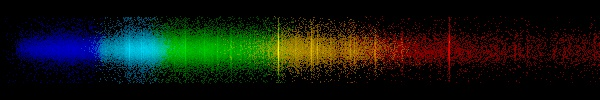

In [13]:
dmimg2jpg infile=ga_red.fits greenfile=ga_green.fits \
      bluefile=ga_blue.fits outfile=ga_1451.jpg clob+ 
      
display < ga_1451.jpg

## Syntax

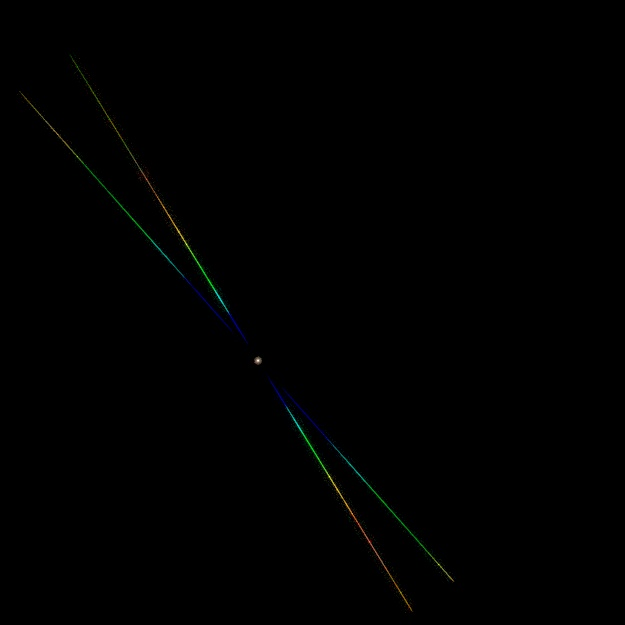

In [14]:
pset dmimg2jpg infile="1451_spec_evt2.fits[energy=000:999][bin sky=2000:7000:8]"
pset dmimg2jpg greenfile="1451_spec_evt2.fits[energy=800:2399][bin sky=2000:7000:8]"
pset dmimg2jpg bluefile="1451_spec_evt2.fits[energy=1700:9999][bin sky=2000:7000:8]"
pset dmimg2jpg outfile=virtual_1451.jpg
dmimg2jpg mode=h clob+

display < virtual_1451.jpg

# Cleanup


In [15]:
/bin/rm -f acisf01451N007_evt2.fits